# fmu.sumo.explorer

Package for browsing cases and surfaces in Sumo.

In [1]:
from fmu.sumo.explorer import Explorer
import xtgeo
from io import BytesIO
%matplotlib inline

## Class: Explorer
Search for cases in SUMO

Methods:
- get_fields()
- get_users()
- get_status()
- get_cases()

In [2]:
sumo = Explorer(env="dev", write_back=True)

2022-04-07 12:24:31 DEBUG    Initialize Auth
2022-04-07 12:24:31 DEBUG    client_id is 1826bd7c-582f-4838-880d-5b4da5c3eea2
2022-04-07 12:24:31 DEBUG    client_id is 1826bd7c-582f-4838-880d-5b4da5c3eea2
2022-04-07 12:24:31 DEBUG    self.writeback is True
2022-04-07 12:24:31 DEBUG    _get_cache
2022-04-07 12:24:31 DEBUG    cache is available
2022-04-07 12:24:31 DEBUG    cache is available, reading it
2022-04-07 12:24:31 DEBUG    Reading from /Users/adnejacobsen/.sumo/88d2b022-3539-4dda-9e66-853801334a86.token
2022-04-07 12:24:32 DEBUG    self.app has been initialized
2022-04-07 12:24:32 DEBUG    Getting accounts
2022-04-07 12:24:32 DEBUG    self.accounts is [{'home_account_id': '7d857070-b26b-423d-8eb0-b5dac0400a17.3aa4a235-b6e2-48d5-9195-7fcf05b459b0', 'environment': 'login.microsoftonline.com', 'username': 'ADNJ@equinor.com', 'authority_type': 'MSSTS', 'local_account_id': '7d857070-b26b-423d-8eb0-b5dac0400a17', 'realm': '3aa4a235-b6e2-48d5-9195-7fcf05b459b0'}]
2022-04-07 12:24:32 DEBU

### Explorer.get_fields()

Returns:

```
Dict
{
    FIELD_NAME: CASE_COUNT
}
```

In [3]:
fields = sumo.get_fields()

print(fields)

2022-04-07 12:24:32 DEBUG    is_token_expired() is starting
2022-04-07 12:24:32 DEBUG    is_expired: False


{'DROGON': 9, 'JOHAN SVERDRUP': 74}


### Explorer.get_users()

Returns:

```
Dict
{
    USER_NAME: CASE_COUNT
}
```

In [4]:
users = sumo.get_users()

print(users)

2022-04-07 12:24:32 DEBUG    is_token_expired() is starting
2022-04-07 12:24:32 DEBUG    is_expired: False


{'2022a_r011p3p0': 2, 'cdf': 3, 'gmcq': 2, 'jsorb': 22, 'maben': 28, 'peesv': 15, 'rpit': 10, 'tomal': 1}


### Explorer.get_status()

Returns:

`Dict`

```
{
    STATUS: CASE_COUNT
}
```

In [5]:
status = sumo.get_status()

print(status)

2022-04-07 12:24:32 DEBUG    is_token_expired() is starting
2022-04-07 12:24:32 DEBUG    is_expired: False


{'keep': 5, 'official': 3, 'scratch': 75}


### Explorer.get_cases()

Params:
- status: string[] 
- fields: string[]
- users: string[]

Returns: `CaseCollection`

In [6]:
my_cases = sumo.get_cases(
    status=["keep", "official"],
    fields=["JOHAN SVERDRUP"],
    #users=["peesv", "jsorb"]
)

print(len(my_cases))

for case in my_cases:
    print(case.case_name)

2022-04-07 12:24:32 DEBUG    is_token_expired() is starting
2022-04-07 12:24:32 DEBUG    is_expired: False
2022-04-07 12:24:32 DEBUG    is_token_expired() is starting
2022-04-07 12:24:32 DEBUG    is_expired: False


5
2022a_r011p3p0_histandpred_ff_20220225
2022a_b011p2p0_komodo_rc4
2022a_r011p3p0_history
2021a_r010p0p0_histandpred_210627
2021a_r009p4p0_hist_210125
Documents length: 5. Index out of range: 5. Fetching next batch!


### Explorer.get_case_from_id()

Params:
- sumo_id: string

Returns: `Case`

In [7]:
my_case = sumo.get_case_by_id("81a57a32-37e7-06bc-924e-6710ba6e59b0")

print(my_case.case_name)

2022-04-07 12:24:33 DEBUG    is_token_expired() is starting
2022-04-07 12:24:33 DEBUG    is_expired: False


2022a_r011p3p0_histandpred_ff_20220225


## Class: Case

Represents a case in Sumo and has methods for finding surfaces belonging to the case.

Some of the case meta data is accessible as attributes, the rest can be extracted from `Case.meta_data`.

Attributes:
- meta_data: dict
- sumo_id: uuid
- fmu_id: uuid
- case_name: string
- field_name: string
- status: string
- user: string

Methods:
- get_object_types()
- get_iterations()
- get_realizations()
- get_object_names()
- get_object_tag_names()
- get_object_aggregations()
- get_object_timespans()
- get_object()

Raw metadata object can be accessed at `Case.meta_data`

In [8]:
# Some case info as attributes
print(my_case.sumo_id)
print(my_case.fmu_id)
print(my_case.case_name)
print(my_case.field_name)
print(my_case.status)
print(my_case.user)

81a57a32-37e7-06bc-924e-6710ba6e59b0
b0734bbe-a7c2-4165-91bd-6e916a60e5a6
2022a_r011p3p0_histandpred_ff_20220225
JOHAN SVERDRUP
official
2022a_r011p3p0


### Case.get_object_types()

Returns:
```
Dict
{
    OBJECT_NAME: OBJECT_COUNT
}
```

In [9]:
object_types = my_case.get_object_types()

print(object_types)

2022-04-07 12:24:33 DEBUG    is_token_expired() is starting
2022-04-07 12:24:33 DEBUG    is_expired: False


{'polygons': 1600, 'surface': 191179, 'table': 1003}


### Case.get_iterations()

Returns:
```
Dict
{
    ITERATION_ID: OBJECT_COUNT
}
```

In [10]:
iterations = my_case.get_iterations()

print(iterations)

2022-04-07 12:24:33 DEBUG    is_token_expired() is starting
2022-04-07 12:24:33 DEBUG    is_expired: False


{0: 193782}


### Case.get_realizations()

Params:
- iteration_id: number

Returns:
```
Dict
{
    REALIZATION_ID: OBJECT_COUNT
}
```

In [11]:
realizations = my_case.get_realizations(iteration_id=0)

print(realizations)

2022-04-07 12:24:34 DEBUG    is_token_expired() is starting
2022-04-07 12:24:34 DEBUG    is_expired: False


{0: 933, 1: 942, 2: 826, 3: 977, 4: 939, 5: 933, 6: 933, 7: 852, 8: 977, 9: 933, 10: 977, 11: 933, 12: 933, 13: 933, 14: 933, 15: 933, 16: 933, 17: 940, 18: 933, 19: 933, 20: 933, 21: 933, 22: 933, 23: 940, 24: 933, 25: 939, 26: 933, 27: 933, 28: 933, 29: 872, 30: 933, 31: 933, 32: 933, 33: 933, 34: 933, 35: 826, 36: 933, 37: 933, 38: 933, 39: 933, 40: 933, 41: 826, 42: 932, 43: 977, 44: 933, 45: 823, 46: 826, 47: 933, 48: 933, 49: 826, 50: 933, 51: 933, 52: 933, 53: 933, 54: 933, 55: 933, 56: 933, 57: 933, 58: 933, 59: 933, 60: 933, 61: 933, 62: 933, 63: 933, 64: 933, 65: 933, 66: 933, 67: 933, 68: 933, 69: 933, 70: 977, 71: 977, 72: 933, 73: 933, 74: 933, 75: 933, 76: 933, 77: 933, 78: 977, 79: 933, 80: 933, 81: 933, 82: 933, 83: 826, 84: 933, 85: 933, 86: 933, 87: 977, 88: 933, 89: 933, 90: 933, 91: 828, 92: 933, 93: 721, 94: 828, 95: 933, 96: 923, 97: 933, 98: 933, 99: 933, 100: 933, 101: 933, 102: 933, 103: 933, 104: 933, 105: 933, 106: 933, 107: 828, 108: 933, 109: 828, 110: 933,

### Case.get_object_property_values()

Get distinct values for a property for a specific object type. I.e: get distinct object names for surfaces.
Can be used to get values that can be used in filtering when retrieving objects.

This method is mean to be dynamic and flexible and can replace all the other `get_object_*`-methods:
- get_object_tag_name
- get_object_names
- get_object_aggregations
- get_object_time_intervals


Params:
- property: string
- object_type: string
- object_name: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

`property` and `object_type` are required, the rest of the parameters are used for filtering and are optional.

Valid `property` values:
- tag_name
- object_name
- time_interval
- aggregation
- iteration_id
- realization_id

Valid `object_type` values:
- surface
- polygons
- table

Returns 
```
Dict {
    [PROPERTY VALUE]: COUNT
}
```

#### Example: filter down to unique surface object

This example uses the `get_object_property_values` in several steps to get values that uniquley identifies a surface object.

In [12]:
# get iteration_ids
iteration_ids = my_case.get_object_property_values(
    property="iteration_id",
    object_type="surface"
)

print(iteration_ids)

iteration_id = list(iteration_ids.keys())[0]

# use the retrieved iteration_id to get tag_names for surfaces within this iteration
tag_names = my_case.get_object_property_values(
    property="tag_name",
    object_type="surface",
    iteration_id=iteration_id,
)

print(tag_names)

tag_name = list(tag_names.keys())[5]

# use the retrieved tag_name to get object_names for surfaces containing this tag_name
object_names = my_case.get_object_property_values(
    property="object_name",
    object_type="surface",
    iteration_id=iteration_id,
    tag_name=tag_name
)

print(object_names)

object_name = list(object_names.keys())[2]

# use the object_name, tag_name and iteration_id to get available time_intervals
time_intervals = my_case.get_object_property_values(
    property="time_interval",
    object_type="surface",
    iteration_id=iteration_id,
    tag_name=tag_name,
    object_name=object_name
)

print(time_intervals)

time_interval = list(time_intervals.keys())[2]

# use the object_name, tag_name and iteration_id to get available aggregations
aggregations = my_case.get_object_property_values(
    property="aggregation",
    object_type="surface",
    iteration_id=iteration_id,
    tag_name=tag_name,
    object_name=object_name
)

print(aggregations)

aggregation = list(aggregations.keys())[3]

# get available realization_ids based on iteration_id, object_name, tag_name and time_interval
realization_ids = my_case.get_object_property_values(
    property="realization_id",
    object_type="surface",
    iteration_id=iteration_id,
    tag_name=tag_name,
    object_name=object_name,
    time_interval=time_interval
)

print(realization_ids)

realization_id = list(realization_ids.keys())[7]

# get surface from realization
surfaces = my_case.get_objects(
    object_type="surface",
    iteration_id=iteration_id,
    tag_name=tag_name,
    object_name=object_name,
    time_interval=time_interval,
    realization_id=realization_id
)

print(len(surfaces))

# get aggregated surface
surfaces = my_case.get_objects(
    object_type="surface",
    iteration_id=iteration_id,
    tag_name=tag_name,
    object_name=object_name,
    time_interval=time_interval,
    aggregation=aggregation
)

print(len(surfaces))

2022-04-07 12:24:34 DEBUG    is_token_expired() is starting
2022-04-07 12:24:34 DEBUG    is_expired: False
2022-04-07 12:24:34 DEBUG    is_token_expired() is starting
2022-04-07 12:24:34 DEBUG    is_expired: False


{0: 191179}


2022-04-07 12:24:35 DEBUG    is_token_expired() is starting
2022-04-07 12:24:35 DEBUG    is_expired: False


{'amplitude_full_max': 4389, 'amplitude_full_mean': 4389, 'amplitude_full_min': 4389, 'amplitude_full_rms': 4389, 'amplitude_near_max': 4389, 'amplitude_near_mean': 4389, 'amplitude_near_min': 4389, 'amplitude_near_rms': 4389, 'average_permx': 199, 'average_poro': 1244, 'average_pressure': 22151, 'average_sgas': 398, 'average_soil': 398, 'average_swat': 20960, 'depth_depth_conversion': 3344, 'facies_thickness': 7942, 'fwl': 124, 'inplace_bulk_oil': 2520, 'inplace_hcpv_oil': 2520, 'inplace_net_oil': 2520, 'inplace_pore_oil': 2520, 'inplace_stoiip_oil': 2520, 'mobile_oilthickness': 4983, 'mobile_oilthickness_rf': 4469, 'oilthickness': 25547, 'oilthickness_rf': 4454, 'overburden': 3344, 'relai_full_max': 4389, 'relai_full_mean': 4389, 'relai_full_min': 4389, 'relai_full_rms': 4389, 'relai_near_max': 4389, 'relai_near_mean': 4389, 'relai_near_min': 4389, 'relai_near_rms': 4389, 'structural_model': 7544, 'velocity_structural_model': 627, 'velocity_structural_model_pre_hmod': 627}


2022-04-07 12:24:35 DEBUG    is_token_expired() is starting
2022-04-07 12:24:35 DEBUG    is_expired: False
2022-04-07 12:24:36 DEBUG    is_token_expired() is starting
2022-04-07 12:24:36 DEBUG    is_expired: False


{'draupne_fm_1': 1463, 'statfjord_gp': 1463, 'total': 1463}
{'2019-10-01 - 2020-10-01': 209, '2019-10-01 - 2021-05-15': 209, '2019-10-01 - 2022-05-15': 209, '2020-10-01 - 2021-05-15': 209, '2021-05-15 - 2022-05-15': 209, '2022-05-15 - 2022-09-01': 209, '2022-05-15 - 2023-05-01': 209}


2022-04-07 12:24:36 DEBUG    is_token_expired() is starting
2022-04-07 12:24:36 DEBUG    is_expired: False
2022-04-07 12:24:36 DEBUG    is_token_expired() is starting
2022-04-07 12:24:36 DEBUG    is_expired: False


{'max': 7, 'mean': 7, 'min': 7, 'numreal': 7, 'p10': 7, 'p50': 7, 'p90': 7, 'std': 7}
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1,

2022-04-07 12:24:36 DEBUG    is_token_expired() is starting
2022-04-07 12:24:36 DEBUG    is_expired: False


1
1


### Case.get_object_tag_names()

Params:
- object_type: string
- iteration_id: number
- realization_id: number
- aggregation: string

<strong>NOTE:</strong>
If no aggregation-parameter is provided, the search will exclude tag names from aggregated objects

Returns:

```
Dict
{
    TAG_NAME: COUNT
}
```


In [13]:
tag_names = my_case.get_object_tag_names(
    object_type="surface",
    iteration_id=0, 
    realization_id=0,
    #aggregation="MEAN"
)

print(tag_names)

2022-04-07 12:24:36 DEBUG    is_token_expired() is starting
2022-04-07 12:24:36 DEBUG    is_expired: False


{'amplitude_full_max': 21, 'amplitude_full_mean': 21, 'amplitude_full_min': 21, 'amplitude_full_rms': 21, 'amplitude_near_max': 21, 'amplitude_near_mean': 21, 'amplitude_near_min': 21, 'amplitude_near_rms': 21, 'average_permx': 1, 'average_poro': 6, 'average_pressure': 109, 'average_sgas': 2, 'average_soil': 2, 'average_swat': 102, 'depth_depth_conversion': 16, 'facies_thickness': 38, 'inplace_bulk_oil': 12, 'inplace_hcpv_oil': 12, 'inplace_net_oil': 12, 'inplace_pore_oil': 12, 'inplace_stoiip_oil': 12, 'mobile_oilthickness': 25, 'mobile_oilthickness_rf': 20, 'oilthickness': 125, 'oilthickness_rf': 20, 'overburden': 16, 'relai_full_max': 21, 'relai_full_mean': 21, 'relai_full_min': 21, 'relai_full_rms': 21, 'relai_near_max': 21, 'relai_near_mean': 21, 'relai_near_min': 21, 'relai_near_rms': 21, 'structural_model': 36, 'velocity_structural_model': 3, 'velocity_structural_model_pre_hmod': 3}


### Case.get_object_names()

Params:
- object_type: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

<strong>NOTE:</strong>
If no aggregation-parameter is provided, the search will exclude surface names from aggregated objects

Returns:
```
Dict
{
    SURFACE_NAME: COUNT
}
```

In [14]:
surface_names = my_case.get_object_names(
    object_type="surface",
    tag_name="amplitude_full_max",
    iteration_id=0, 
    realization_id=0,
    #aggregation="MEAN"
)

print(surface_names)

2022-04-07 12:24:37 DEBUG    is_token_expired() is starting
2022-04-07 12:24:37 DEBUG    is_expired: False


{'draupne_fm_1': 7, 'statfjord_gp': 7, 'total': 7}


### Case.get_object_aggregations()

Params:
- object_type: string
 - object_name: string
 - tag_name: string
 - iteration_id: number

Returns:
````
Dict
{
    AGGREGATION_OPERATION: COUNT
}

In [15]:
aggregations = my_case.get_object_aggregations(
    object_type="surface",
    object_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    iteration_id=0,
)

print(aggregations)

2022-04-07 12:24:37 DEBUG    is_token_expired() is starting
2022-04-07 12:24:37 DEBUG    is_expired: False


{'max': 7, 'mean': 7, 'min': 7, 'numreal': 7, 'p10': 7, 'p50': 7, 'p90': 7, 'std': 7}


### Case.get_object_times_intervals()

Params:
- object_type: string
- object_name: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:
`````
Dict
{
    TIMESPAN: COUNT
}

In [16]:
intervals = my_case.get_object_time_intervals(
    object_type="surface",
    object_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    iteration_id=0,
    #realization_id=0,
    aggregation="MEAN"
)

print(intervals)

2022-04-07 12:24:37 DEBUG    is_token_expired() is starting
2022-04-07 12:24:37 DEBUG    is_expired: False


{'2019-10-01 - 2020-10-01': 1, '2019-10-01 - 2021-05-15': 1, '2019-10-01 - 2022-05-15': 1, '2020-10-01 - 2021-05-15': 1, '2021-05-15 - 2022-05-15': 1, '2022-05-15 - 2022-09-01': 1, '2022-05-15 - 2023-05-01': 1}


### Case.get_objects()

Params:
- object_type: string
- object_name: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:
`DocumentCollection[ChildObject]`

In [17]:
# Get a surface object from specific realization
surfaces = my_case.get_objects(
    object_type="surface",
    object_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    time_interval="2019-10-01 - 2020-10-01",
    iteration_id=0,
    realization_id=0
)

s = surfaces[0]

print(s.name)
print(s.tag_name)

2022-04-07 12:24:37 DEBUG    is_token_expired() is starting
2022-04-07 12:24:37 DEBUG    is_expired: False


draupne_fm_1
amplitude_full_max


In [18]:
# Get all versions of surface object (1 from each realization) for a specified iteration
surfaces = my_case.get_objects(
    object_type="surface",
    object_name="Aasgard Fm. Top",
    tag_name="structural_model",
    iteration_id=0
)

print(len(surfaces))

2022-04-07 12:24:38 DEBUG    is_token_expired() is starting
2022-04-07 12:24:38 DEBUG    is_expired: False


201


In [19]:
# Get specific aggregated surface
surfaces = my_case.get_objects(
    object_type="surface",
    object_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    time_interval="2019-10-01 - 2020-10-01",
    iteration_id=0,
    aggregation="MEAN"
)

s = surfaces[0]

print(s.name)
print(s.tag_name)

2022-04-07 12:24:38 DEBUG    is_token_expired() is starting
2022-04-07 12:24:38 DEBUG    is_expired: False


draupne_fm_1
amplitude_full_max


2022-04-07 12:24:38 DEBUG    is_token_expired() is starting
2022-04-07 12:24:38 DEBUG    is_expired: False
2022-04-07 12:24:40 INFO     Ran init of xtgeo.common.sys, ID is 4501731216
2022-04-07 12:24:40 INFO     Checking file...
2022-04-07 12:24:40 INFO     Signature is irap binary
2022-04-07 12:24:40 INFO     Enter function xtgeo.surface._regsurf_import
2022-04-07 12:24:40 INFO     Start __init__ method for RegularSurface object 5005738768
2022-04-07 12:24:40 INFO     xtgeo.plot.xtmap.Map
2022-04-07 12:24:40 INFO     Ran __init__ ...
2022-04-07 12:24:40 INFO     xtgeo.plot.xtmap.Map
2022-04-07 12:24:40 INFO     Infotext is <None>
2022-04-07 12:24:40 INFO     Definition of a colormap from string name: rainbow
2022-04-07 12:24:40 INFO     Defining colormap
2022-04-07 12:24:40 INFO     Valid color maps: ['Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuR

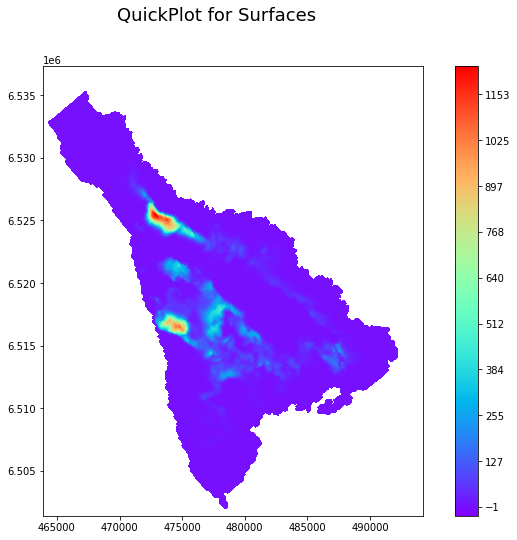

In [20]:
# Visualize aggregated surface with xtgeo
bytestring = BytesIO(s.blob)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

2022-04-07 12:24:42 DEBUG    is_token_expired() is starting
2022-04-07 12:24:42 DEBUG    is_expired: False


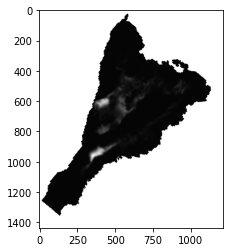

In [21]:
# Get surface as png + visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

bytestring = BytesIO(s.png)
img = mpimg.imread(bytestring)
imgplot = plt.imshow(img)
plt.show()

## Class: DocumentCollection

A set of documents from Sumo. Inherits from collections.Sequence and acts as a list of documents.

In [22]:
surfaces = my_case.get_objects(
    object_type="surface",
    object_name="Aasgard Fm. Top",
    tag_name="structural_model",
    iteration_id=0
)

for s in surfaces[1:3]:
    print(s.name)
    print(s.realization_id)
    print(s.object_type)

2022-04-07 12:24:44 DEBUG    is_token_expired() is starting
2022-04-07 12:24:44 DEBUG    is_expired: False


Aasgard Fm. Top
200
surface
Aasgard Fm. Top
85
surface


### ObjectCollection.aggregate()

On-demand aggregation of objects. Currently only supports surface objects.

Params:
- operations: string || string[]

Returns: blob if one operation is provided, dictionary of blobs if multiple operations:
```
Dict
{
    OPERATION: BLOB
}
```

In [23]:
surfaces = my_case.get_objects(
    object_type="surface",
    object_name="Aasgard Fm. Top",
    tag_name="structural_model",
    iteration_id=0
)

print(len(surfaces))

# One operation
mean = surfaces.aggregate("MEAN")

# Multiple
#aggs = surfaces.aggregate(["MEAN", "MIN", "MAX"])
#mean = aggs["MEAN"]

2022-04-07 12:24:44 DEBUG    is_token_expired() is starting
2022-04-07 12:24:44 DEBUG    is_expired: False
2022-04-07 12:24:45 DEBUG    is_token_expired() is starting
2022-04-07 12:24:45 DEBUG    is_expired: False


201


2022-04-07 12:24:46 DEBUG    is_token_expired() is starting
2022-04-07 12:24:46 DEBUG    is_expired: False


PermanentError: Fatal Request Error with status code 502 and text <html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx</center>
</body>
</html>
.

In [ ]:
# Visualize aggregated surface with xtgeo
bytestring = BytesIO(mean)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

## Class: ChildObject
Represents a child object in Sumo. 

Some of the meta data is accessible as attributes, the rest can be extracted from `ChildObject.meta_data`

Attributes:
- meta_data: dict
- sumo_id:uuid
- iteration_id: number
- realization_id: number
- name: string
- relative_path: string
- full_path: string
- aggregation: string
- object_type: string

Properties:
- blob: blob

In [ ]:
s = surfaces[0]

# Get meta_data and blob
meta_data = s.meta_data
blob = s.blob

# Get data from meta_data attribute
file_path = meta_data["file"]["relative_path"]

# Or use attribute
file_path = s.relative_path

## Example: process of finding a surface from case


In [ ]:
my_case = sumo.get_case_by_id("81a57a32-37e7-06bc-924e-6710ba6e59b0")

# Get iteration
iterations = my_case.get_iterations()

i = list(iterations.keys())[0]


# Get realization
realizations = my_case.get_realizations(
    iteration_id=i
)

r = list(realizations.keys())[0]


# Get tag names
tag_names = my_case.get_object_tag_names(
    object_type="surface",
    iteration_id=i,
    realization_id=r
)

t = list(tag_names.keys())[0]


# Get surface name
surface_names = my_case.get_object_names(
    object_type="surface",
    tag_name=t,
    iteration_id=i,
    realization_id=r
)

n = list(surface_names.keys())[0]


# Get surface
surfaces = my_case.get_objects(
    object_type="surface",
    object_name=n,
    tag_name=t,
    iteration_id=i,
    realization_id=r
)

s = surfaces[0]

# Visualize with xtgeo
bytestring = BytesIO(s.blob)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

# Print info
print(f"Case: {my_case.case_name}")
print(f"Iteration: {i}")
print(f"Realization: {r}")
print(f"Surface name: {n}")
print(f"Tag name: {t}")